In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [361]:
#reading data
df=pd.read_csv('CarPrice_Assignment.csv')
print(df.shape)
print(df.drop_duplicates().shape) # No duplicates

(205, 26)
(205, 26)


In [362]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [363]:
df.info() 
#No missig values , so No null handling is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [364]:
#checking categorical variables
cat_vars=[x for x in df.columns if df[x].dtype=='object']
df[cat_vars].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [365]:
#checking Numerical variables
num_vars=[x for x in df.columns if df[x].dtype!='object']
# Exclude target variable 'price'
#num_vars.remove('price')
df[num_vars].head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

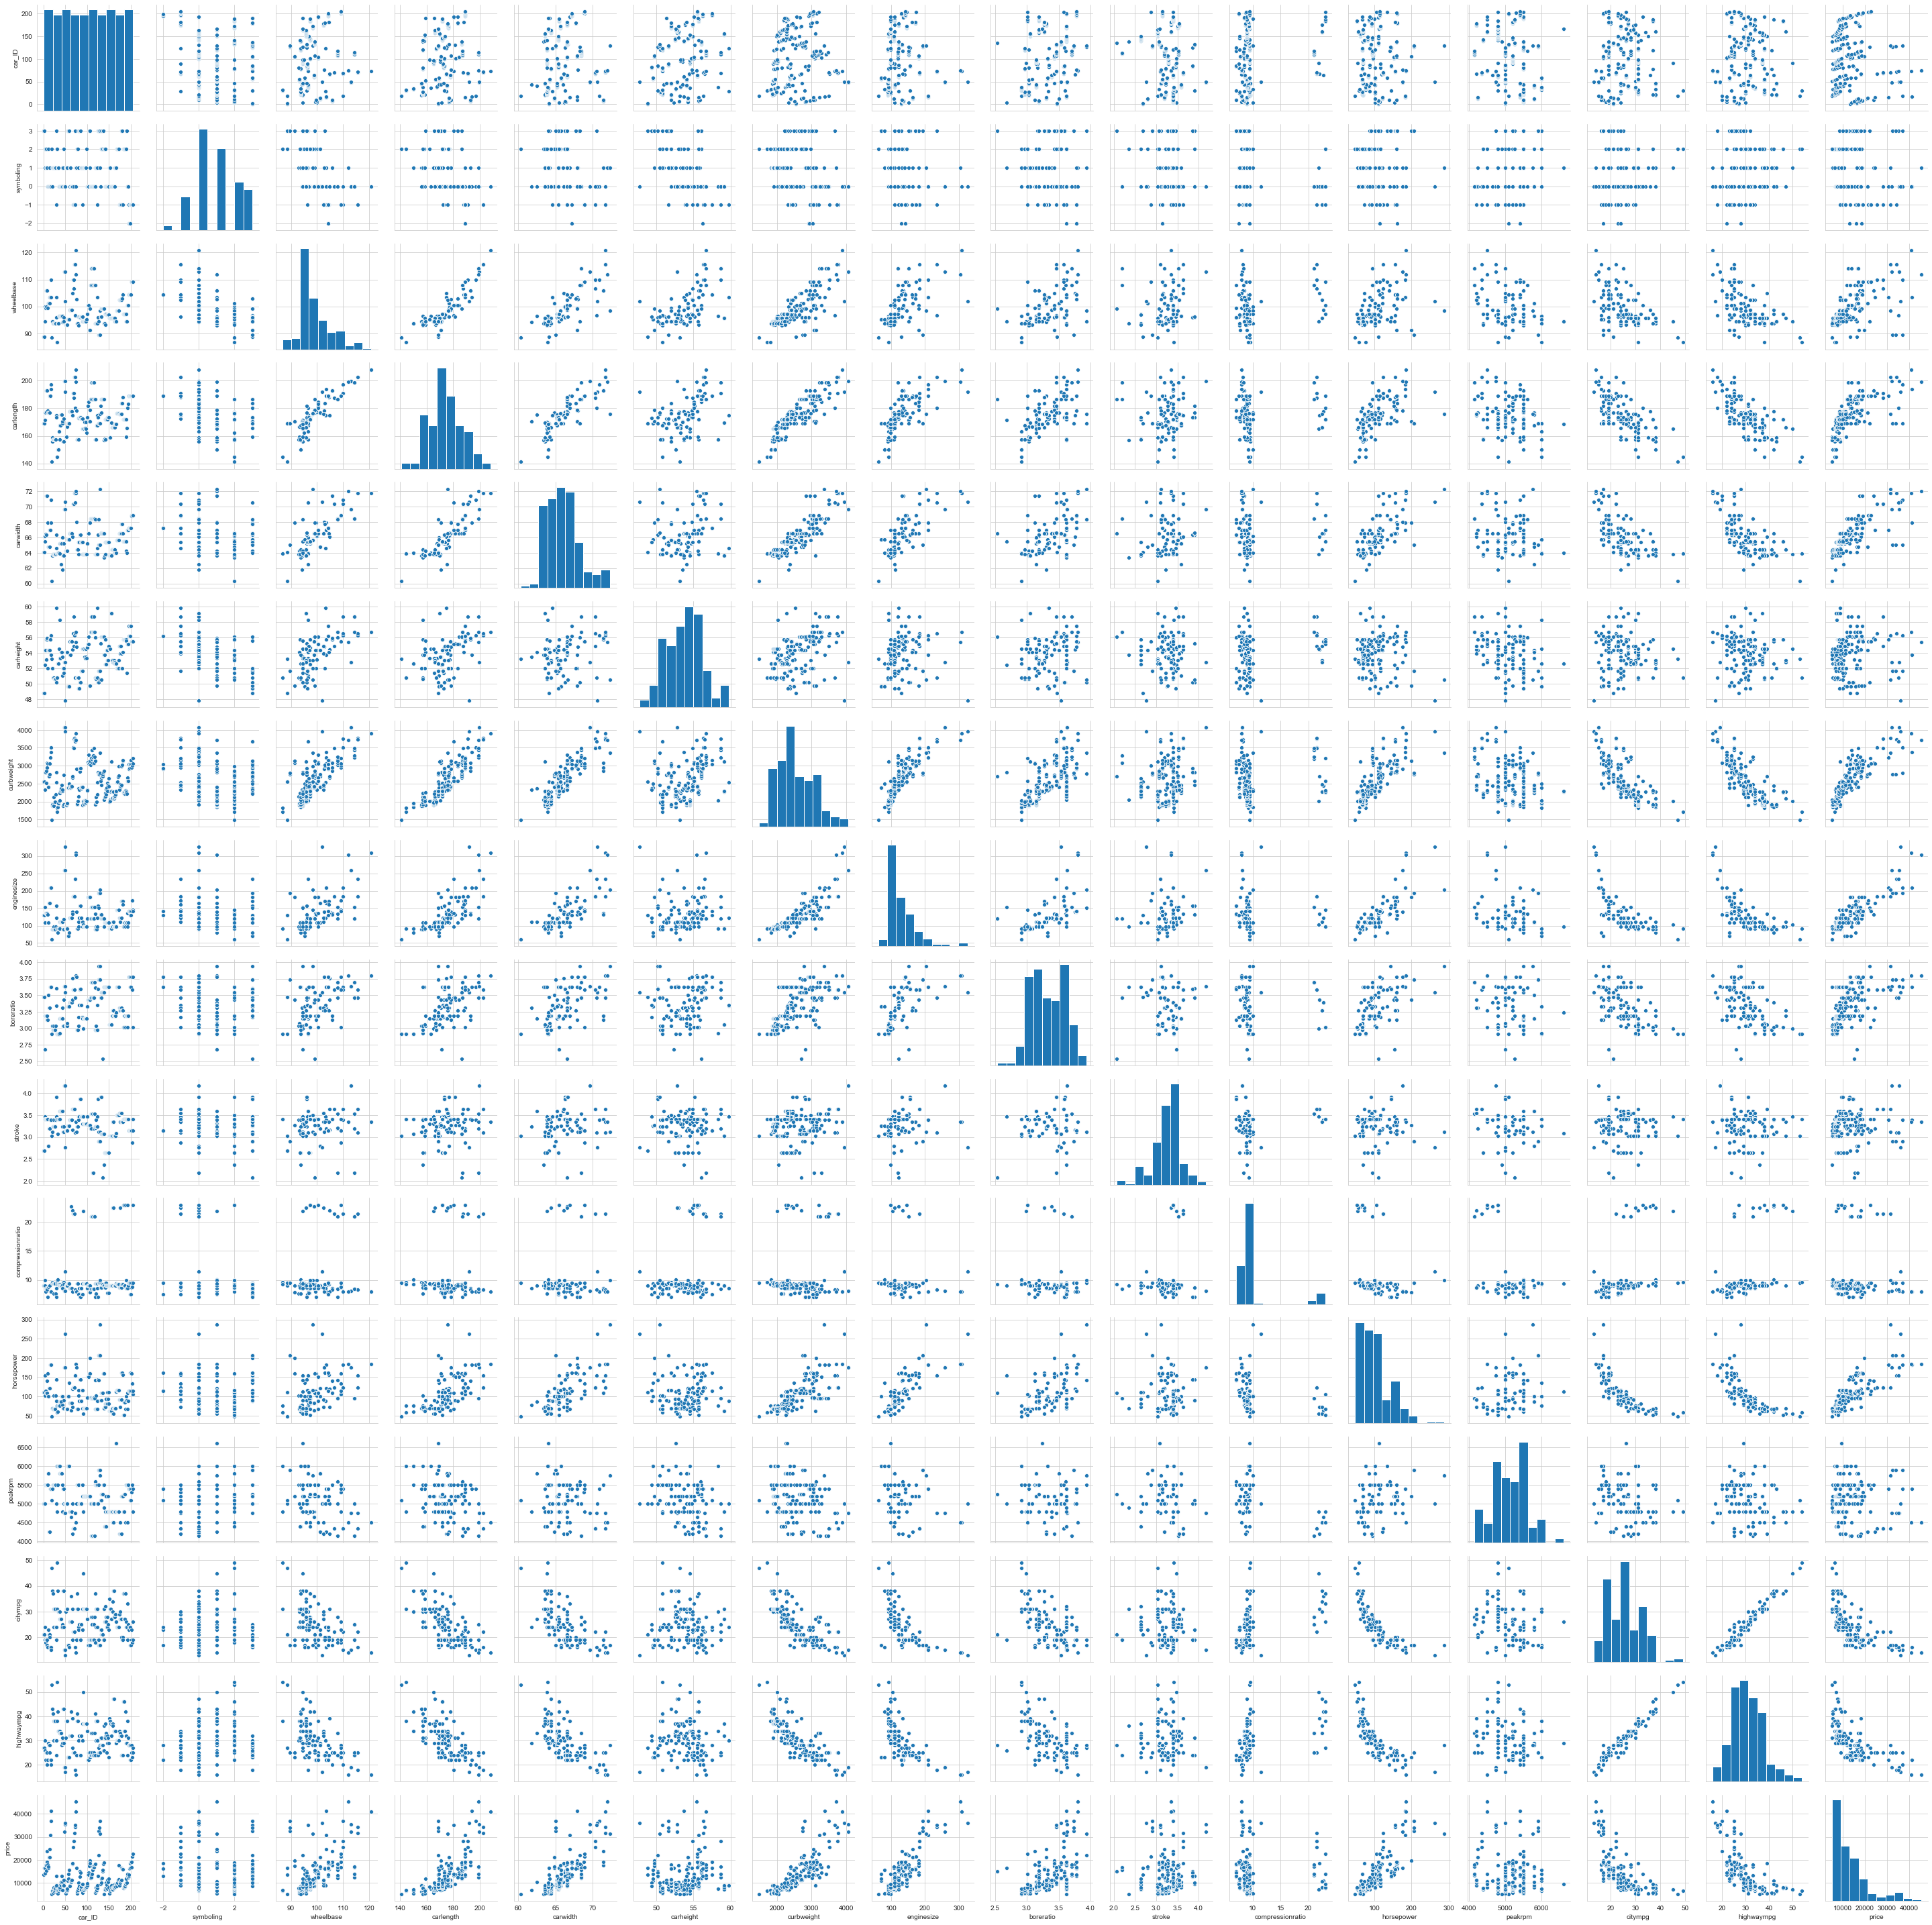

In [366]:
# First we need to check if price has linear relationship with any of independent variables
sns.pairplot(df)

some numerical columns exhibit linear relationship with price. Some variables are highly correlated

like wheelbase,carlength,carwidth,carheight,enginesize

So we can use a linear model here

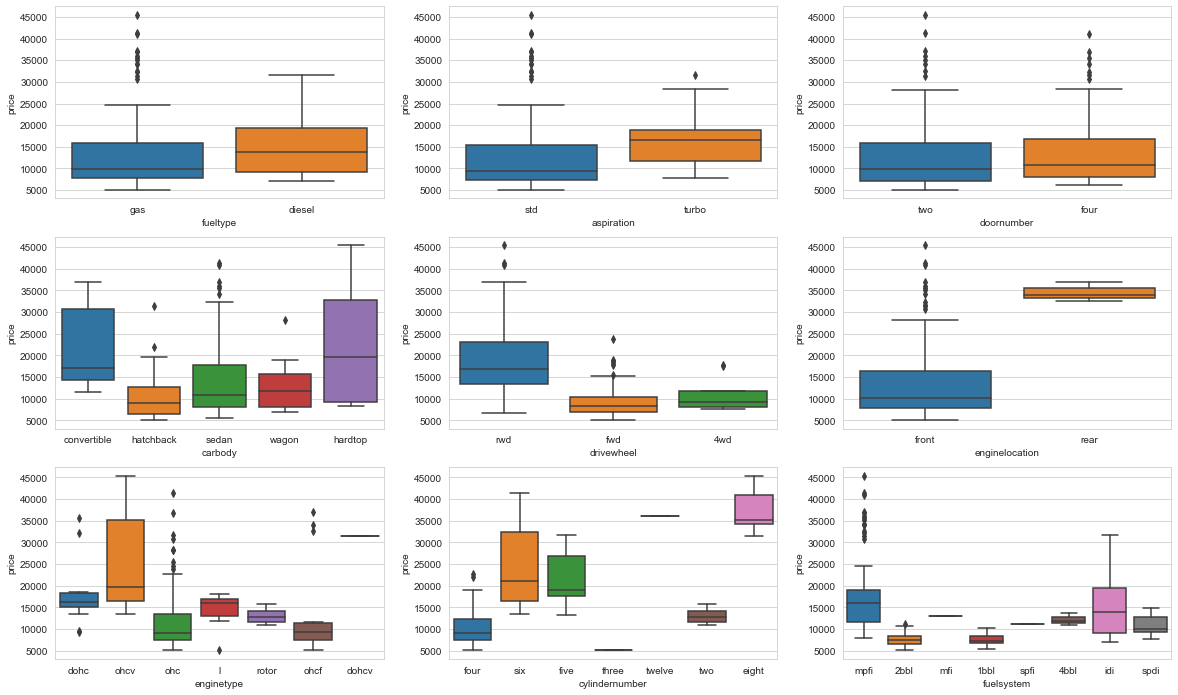

In [367]:
# Visualizing categorical vars relatinship with price[target]
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x=df['fueltype'],y=df['price'],data=df)
plt.subplot(3,3,2)
sns.boxplot(x=df['aspiration'],y=df['price'],data=df)
plt.subplot(3,3,3)
sns.boxplot(x=df['doornumber'],y=df['price'],data=df)
plt.subplot(3,3,4)
sns.boxplot(x=df['carbody'],y=df['price'],data=df)
plt.subplot(3,3,5)
sns.boxplot(x=df['drivewheel'],y=df['price'],data=df)
plt.subplot(3,3,6)
sns.boxplot(x=df['enginelocation'],y=df['price'],data=df)
plt.subplot(3,3,7)
sns.boxplot(x=df['enginetype'],y=df['price'],data=df)
plt.subplot(3,3,8)
sns.boxplot(x=df['cylindernumber'],y=df['price'],data=df)
plt.subplot(3,3,9)
sns.boxplot(x=df['fuelsystem'],y=df['price'],data=df)

# Insights
1. Diesel car expensive than gas
2. Door no doesnt affect much price
3. Drivewheel with rwd are expensive
4. Car with rear engine location are expensive
5. No linear relationship between cyclindernumber & price

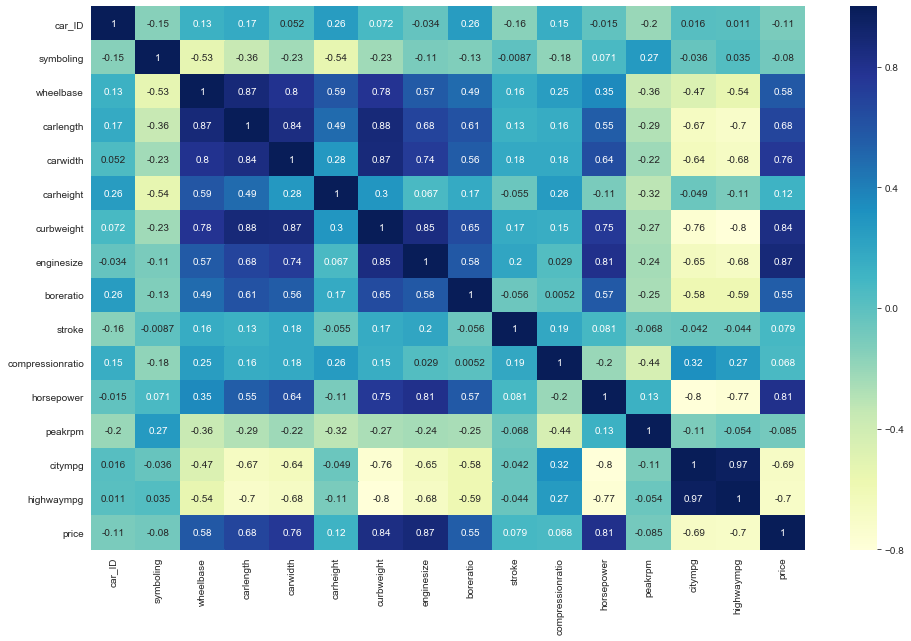

In [368]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Text(0, 0.5, 'Car Price')

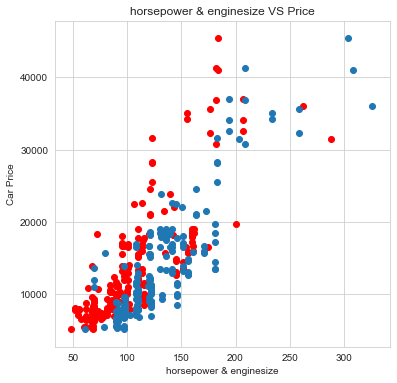

In [369]:
plt.figure(figsize=[6,6])
plt.scatter(df.horsepower, df.price,color='r')
plt.scatter(df.enginesize, df.price)
plt.title('horsepower & enginesize VS Price')
plt.xlabel('horsepower & enginesize')
plt.ylabel('Car Price')

# Data prep

In [370]:
# as mentioned in assignment, getting rid of car model name from "CarName"
df['CarName']=df['CarName'].apply(lambda x : x.lower().split(' ')[0])

In [371]:
df['CarName'].unique()

# Some car name are mispelled. Correcting as below

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [372]:
carname_mapping={'maxda':'mazda',
'porcshce':'porsche',
'toyouta':'toyota',
'vokswagen':'volkswagen',
'vw':'volkswagen'}

In [373]:
df['CarName']=df['CarName'].replace(carname_mapping)

In [374]:
df['CarName'].nunique()

22

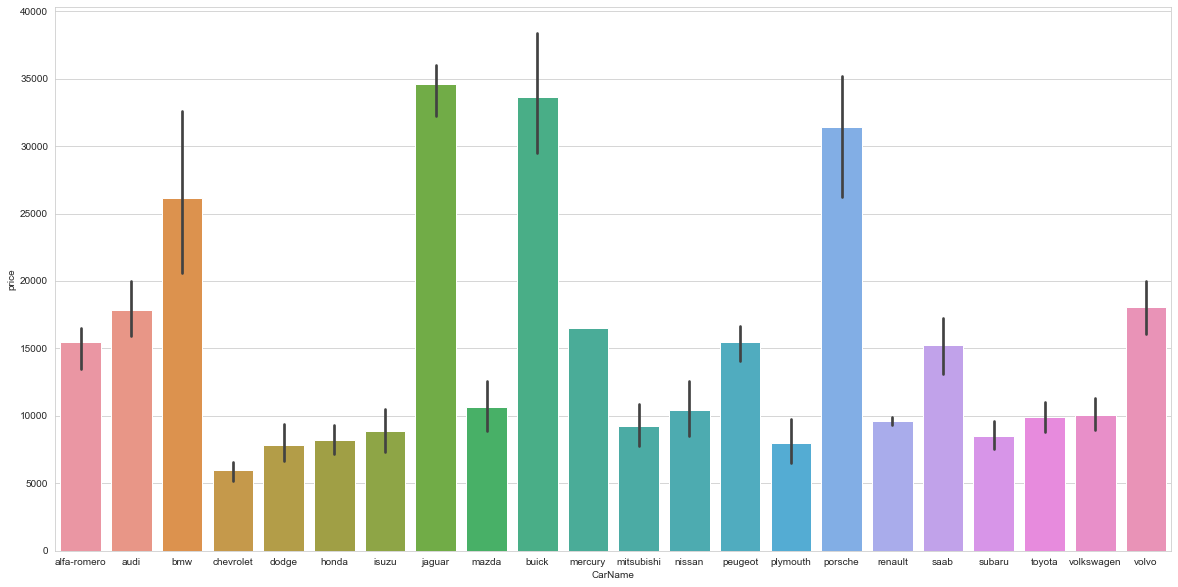

In [375]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['CarName'],y=df['price'],data=df)

In [376]:
df[cat_vars].sample(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
52,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
181,toyota,gas,std,four,wagon,rwd,front,dohc,six,mpfi
5,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
18,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
188,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi


In [377]:
for col in df[cat_vars].columns:
    print(col,df[col].nunique())

CarName 22
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


In [378]:
#  Encoding variables where category level more than 3
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_en_cols=['carbody','enginetype','cylindernumber','fuelsystem']
for col in df[label_en_cols].columns:
    df[col]=le.fit_transform(df[col])

In [379]:
# Creating dummy variables for the rest
dummy_cols=['fueltype','aspiration', 'doornumber', 'enginelocation','drivewheel']
for col in df[dummy_cols].columns:
    df[col]=pd.get_dummies(df[col],drop_first=True)
    

In [380]:
df[cat_vars].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,1,0,1,0,0,0,0,2,5
1,alfa-romero,1,0,1,0,0,0,0,2,5
2,alfa-romero,1,0,1,2,0,0,5,3,5
3,audi,1,0,0,3,1,0,3,2,5
4,audi,1,0,0,3,0,0,3,1,5


# Data split & scaling

In [381]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [382]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Applying scaler() to all the columns except the categorical variables. FIT needs to be done ONLY on train dataset
#num_vars.remove('price') # as we dont want to scale target variable
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

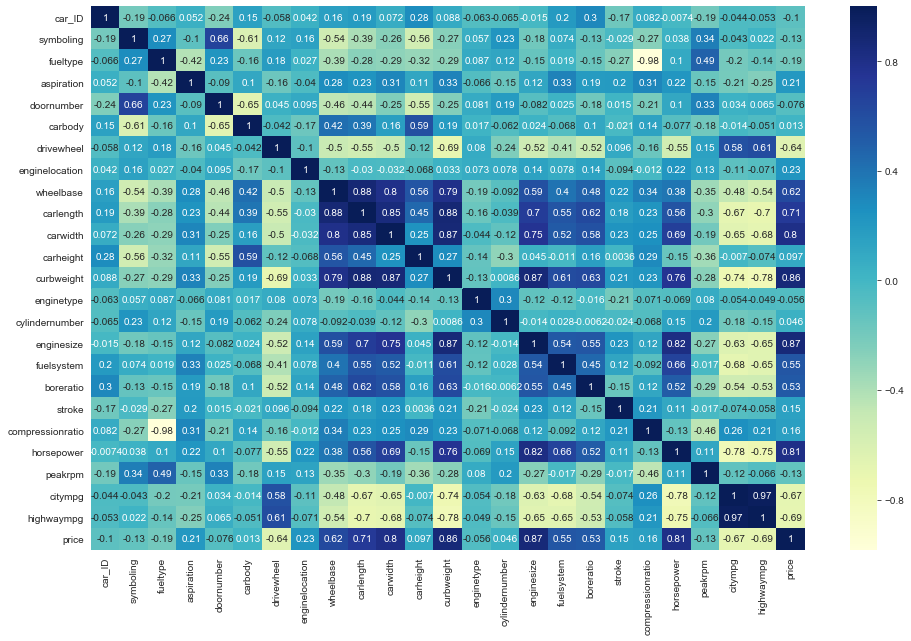

In [383]:
# Let's AGAIN check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Model building

In [384]:
y_train = df_train.pop('price')
X_train = df_train

In [385]:
X_train.pop('CarName')  #removing this col , not looking useful. Cat col with 22 unique values

122       plymouth
125        porsche
166         toyota
1      alfa-romero
199          volvo
          ...     
87      mitsubishi
103         nissan
67           buick
24           dodge
8             audi
Name: CarName, Length: 143, dtype: object

In [386]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [387]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     39.00
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.68e-45
Time:                        22:18:41   Log-Likelihood:                 173.51
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     118   BIC:                            -223.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3320      0.301     -1.102      0.273      -0.929       0.265
car_ID              -0.1198      0.029     -4.127      0.000      -0.177      -0.062
symboling            0.0382      0.049      0.783      0.435      -0.058       0.135
fueltype             0.1838      0.252      0.730      0.467      -0.314       0.682
aspiration           0.0266      0.031      0.851      0.397      -0.035       0.088
doornumber          -0.0165      0.022     -0.736      0.463      -0.061       0.028
carbody             -0.0195      0.013     -1.478      0.142      -0.046       0.007
drivewheel          -0.0639      0.025     -2.583      0.011      -0.113      -0.015
enginelocation       0.3101      0.094      3.298      0.001       0.124       0.496
wheelbase            0.1051      0.105      1.004      0.318      -0.102       0.312
carlength           -0.0184      0.121     -0.152      0.880      -0.258       0.221
carwidth             0.2574      0.125      2.053      0.042       0.009       0.506
carheight            0.0890      0.054      1.648      0.102      -0.018       0.196
curbweight           0.1130      0.161      0.701      0.485      -0.206       0.432
enginetype           0.0072      0.008      0.893      0.374      -0.009       0.023
cylindernumber       0.0025      0.012      0.215      0.830      -0.021       0.026
enginesize           0.6120      0.167      3.676      0.000       0.282       0.942
fuelsystem           0.0052      0.006      0.904      0.368      -0.006       0.016
boreratio           -0.0340      0.053     -0.644      0.521      -0.138       0.070
stroke              -0.0759      0.062     -1.228      0.222      -0.198       0.046
compressionratio     0.2395      0.289      0.829      0.409      -0.333       0.812
horsepower           0.1435      0.156      0.922      0.359      -0.165       0.452
peakrpm              0.0687      0.055      1.241      0.217      -0.041       0.178
citympg             -0.1116      0.209     -0.534      0.595      -0.526       0.302
highwaympg           0.1756      0.198      0.885      0.378      -0.217       0.568
==============================================================================
Omnibus:                       49.154   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.216
Skew:                           1.067   Prob(JB):                     4.23e-58
Kurtosis:                       9.308   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
# Second model
X_train_lm = sm.add_constant(X_train[['horsepower']])
lr2 = sm.OLS(y_train, X_train_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.04e-34
Time:                        22:18:41   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.287      -0.056       0.017
horsepower     1.0506      0.065     16.180      0.000       0.922       1.179
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.578
Skew:                           1.166   Prob(JB):                     2.32e-12
Kurtosis:                       4.886   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
# Third model
X_train_lm = sm.add_constant(X_train[['horsepower','enginesize']])
lr3 = sm.OLS(y_train, X_train_lm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.17e-47
Time:                        22:18:41   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.000      -0.110      -0.048
horsepower     0.3791      0.090      4.235      0.000       0.202       0.556
enginesize     0.8787      0.096      9.170      0.000       0.689       1.068
==============================================================================
Omnibus:                       15.465   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.301
Skew:                           0.589   Prob(JB):                     1.44e-05
Kurtosis:                       4.534   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
# Fourth model
X_train_lm = sm.add_constant(X_train[['horsepower','enginesize','carwidth']])
lr4 = sm.OLS(y_train, X_train_lm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.63e-51
Time:                        22:18:41   Log-Likelihood:                 138.98
No. Observations:                 143   AIC:                            -270.0
Df Residuals:                     139   BIC:                            -258.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1631      0.021     -7.619      0.000      -0.205      -0.121
horsepower     0.2995      0.083      3.601      0.000       0.135       0.464
enginesize     0.6335      0.099      6.404      0.000       0.438       0.829
carwidth       0.3496      0.065      5.341      0.000       0.220       0.479
==============================================================================
Omnibus:                       32.654   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.279
Skew:                           0.975   Prob(JB):                     9.04e-16
Kurtosis:                       5.798   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
# Fifth model
#X_train_lm = sm.add_constant(X_train[['horsepower','carwidth']]) #manual
X_train_lm = sm.add_constant(X_train[['enginelocation','curbweight','enginesize']]) #RFE columns
lr5 = sm.OLS(y_train, X_train_lm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     216.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.58e-52
Time:                        22:18:41   Log-Likelihood:                 141.03
No. Observations:                 143   AIC:                            -274.1
Df Residuals:                     139   BIC:                            -262.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1303      0.017     -7.765      0.000      -0.163      -0.097
enginelocation     0.3875      0.094      4.108      0.000       0.201       0.574
curbweight         0.5049      0.074      6.852      0.000       0.359       0.651
enginesize         0.5841      0.102      5.745      0.000       0.383       0.785
==============================================================================
Omnibus:                       33.347   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.422
Skew:                           0.905   Prob(JB):                     1.04e-19
Kurtosis:                       6.376   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [392]:
#Lets check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

,Features,VIF
3,enginesize,4.19
2,curbweight,4.11
1,enginelocation,1.05


In [393]:
lr5.params

#This means a unit change in "enginelocation" will increase price by 0.3875 unit when all other params are kept same


const            -0.130318
enginelocation    0.387510
curbweight        0.504928
enginesize        0.584081
dtype: float64

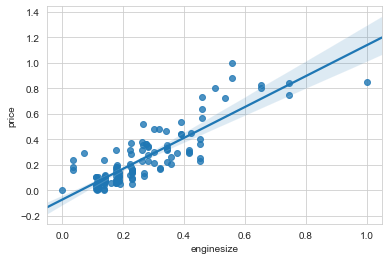

In [394]:
# Let's visualise the data with a scatter plot and the fitted regression line
sns.regplot(X_train_lm['enginesize'],y_train)

In [395]:
# Replacing curbweight with Stroke
# Sixth model
X_train_lm = sm.add_constant(X_train[['horsepower','enginesize','carwidth','curbweight']])
lr6 = sm.OLS(y_train, X_train_lm).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.91e-51
Time:                        22:18:42   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.000      -0.200      -0.117
horsepower     0.2825      0.082      3.448      0.001       0.120       0.444
enginesize     0.4862      0.113      4.286      0.000       0.262       0.710
carwidth       0.2078      0.086      2.429      0.016       0.039       0.377
curbweight     0.2453      0.098      2.511      0.013       0.052       0.439
==============================================================================
Omnibus:                       36.489   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.927
Skew:                           1.009   Prob(JB):                     6.62e-21
Kurtosis:                       6.394   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [396]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

,Features,VIF
4,curbweight,7.28
2,enginesize,5.26
3,carwidth,4.26
1,horsepower,3.14


# Trying Automatic feature selection using RFE

In [397]:
# To use RFE we need to build model using SCITKIT learn ONLY.
print(X_train.shape)
print(y_train.shape)
X_train.columns

(143, 24)
(143,)


Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [398]:
X_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.478061,0.559441,0.909091,0.181818,0.440559,2.664336,0.594406,0.006993,0.411141,0.525476,...,2.174825,0.241351,3.118881,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976
std,0.289106,0.239200,0.288490,0.387050,0.498199,0.838712,0.492733,0.083624,0.205581,0.204848,...,0.890598,0.154619,2.019237,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232843,0.400000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.272414,0.399187,...,2.000000,0.135849,1.000000,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216
50%,0.470588,0.600000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.341379,0.502439,...,2.000000,0.184906,3.000000,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378
75%,0.718137,0.600000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.503448,0.669919,...,2.000000,0.301887,5.000000,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [399]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
sk_lr=LinearRegression()


sk_lr.fit(X_train,y_train)

rfe = RFE(sk_lr, 3)             
rfe = rfe.fit(X_train, y_train)

In [400]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 4),
 ('symboling', False, 14),
 ('fueltype', False, 15),
 ('aspiration', False, 16),
 ('doornumber', False, 19),
 ('carbody', False, 17),
 ('drivewheel', False, 5),
 ('enginelocation', True, 1),
 ('wheelbase', False, 6),
 ('carlength', False, 18),
 ('carwidth', False, 2),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginetype', False, 20),
 ('cylindernumber', False, 22),
 ('enginesize', True, 1),
 ('fuelsystem', False, 21),
 ('boreratio', False, 11),
 ('stroke', False, 7),
 ('compressionratio', False, 12),
 ('horsepower', False, 3),
 ('peakrpm', False, 9),
 ('citympg', False, 10),
 ('highwaympg', False, 8)]

In [401]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'curbweight', 'enginesize'], dtype='object')

# Residual Analysis of the train data

Text(0.5, 1.0, 'Error Distribution on TRAIN data')

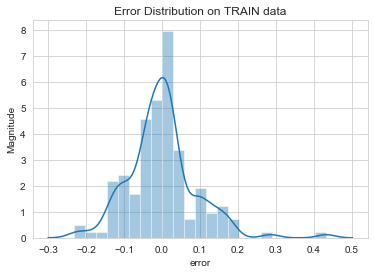

In [402]:
#Reverting back X_train_lm as per Model 5
X_train_lm = sm.add_constant(X_train[['enginelocation','curbweight','enginesize']])

y_train_price = lr5.predict(X_train_lm)

sns.distplot(y_train-y_train_price)
plt.xlabel('error')
plt.ylabel('Magnitude')
plt.title('Error Distribution on TRAIN data')

Text(0, 0.5, 'y_train-y_train_price')

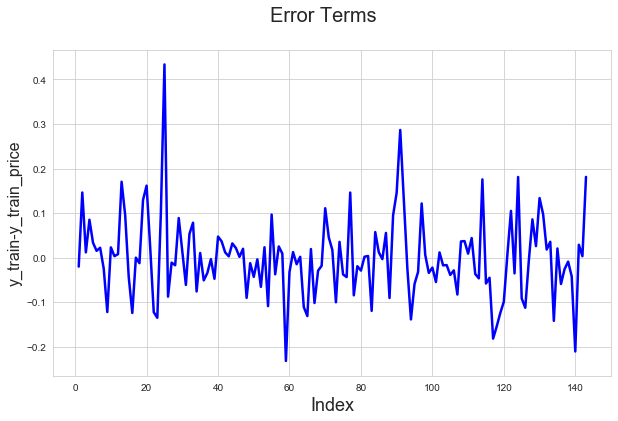

In [403]:
# It is clear from above plot that error is normally distributed and mean around Zero
# Now lets plot resuide and the distribution should be random

c = [i for i in range(1,144,1)]  #144 just to match shape of res
fig = plt.figure(figsize=(10,6))
plt.plot(c,y_train-y_train_price, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train-y_train_price', fontsize=16)      # Y-label

In [404]:
print('r2_score of TRAIN data :',round(r2_score(y_train,y_train_price),4))

r2_score of TRAIN data : 0.8237


# Making Predictions Using the OLS Model

In [405]:
#Scaling
df_test[num_vars] = scaler.transform(df_test[num_vars])

X_test=df_test.drop(['CarName','price'],axis=1)
y_test=df_test['price']

X_test_lm = sm.add_constant(X_test[['enginelocation','curbweight','enginesize']])
y_pred = lr5.predict(X_test_lm)

# Model evaluation OLS

Text(0, 0.5, 'y_pred')

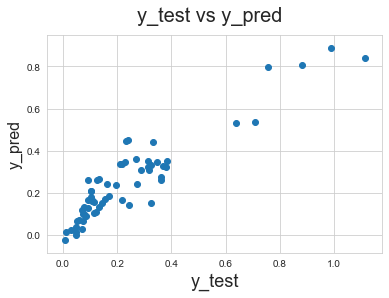

In [406]:
# plot true Vs predicted values to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [407]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean_squared_error :',round(mean_squared_error(y_test,y_pred),4))
print('          r2_score :',round(r2_score(y_test,y_pred),4))

# MSE should be close to 0
# r2 Best possible score is 1.0 and it can be negative
#should be as high as possible, it says how much variance this model can explain/cover

mean_squared_error : 0.0079
          r2_score : 0.8522


Text(0.5, 1.0, 'Error Distribution on Test data')

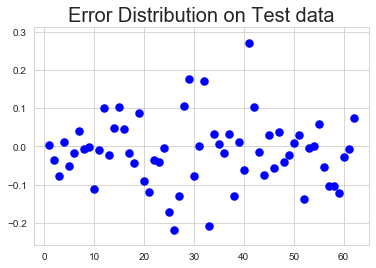

In [408]:
c = [i for i in range(1,63,1)]  #144 just to match shape of res
#fig = plt.figure(figsize=(10,6))
plt.scatter(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Distribution on Test data', fontsize=20)              # Plot heading 
# error terms don't have any pattern , its random white noise, So good
# It is good because this means there is NO variable/relation that was missed in the model and everything is captured.

Text(0.5, 1.0, 'Error Distribution on TEST data')

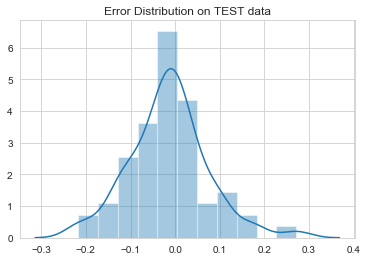

In [409]:

X_test_lm = sm.add_constant(X_test[['enginelocation','curbweight','enginesize']])
y_pred = lr5.predict(X_test_lm)

sns.distplot(y_test-y_pred,rug=False)
plt.title('Error Distribution on TEST data')

# Making Predictions Using Scikit model

In [410]:
from sklearn.linear_model import LinearRegression
sk_lr=LinearRegression()
sk_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [411]:
#These are scaled values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(143, 24)
(143,)
(62, 24)
(62,)


In [412]:
y_pred_sk = sk_lr.predict(X_test)

In [413]:
print('mean_squared_error :',round(mean_squared_error(y_test,y_pred_sk),4))
print('          r2_score :',round(r2_score(y_test,y_pred_sk),4))

mean_squared_error : 0.0048
          r2_score : 0.9094
